## Observations and Insights 

In [34]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.

# len(combined_data['Mouse ID'].unique())
total_mice = combined_data['Mouse ID'].nunique()
total_mice

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# filter- dataset[condition of the filter]*is the condition to compare the 2 columns for duplicates
# example - combined_data[combined_data['Sex'] == 'Female']

duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice_unique = duplicate_mice["Mouse ID"].unique()
duplicate_mice_unique

array(['g989'], dtype=object)

In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
# dataframe[dataframe column]=="what I would like to filter"
combined_data[combined_data['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df['Mouse ID'].nunique()
total_mice

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# which dataframe.groupby("what do I want to group by")["using which column"].to find the mean
tumor_mean = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_mean

tumor_median = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
tumor_median

tumor_variance = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
tumor_variance

tumor_std = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
tumor_std

tumor_sem = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
tumor_sem
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_summary = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_variance,
    "Standard Deviation": tumor_std,
    "SEM": tumor_sem
})
tumor_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [55]:
# clean_df.groupby("Drug Regimen")['Mouse ID'].count().sort_values(ascending=False)
mouse_drug_count = clean_df["Drug Regimen"].value_counts()
mouse_drug_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

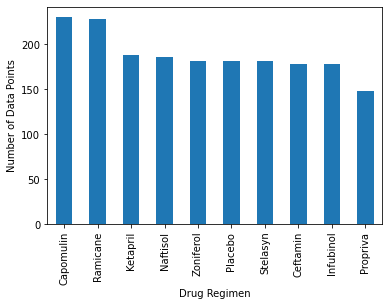

In [61]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_drug_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

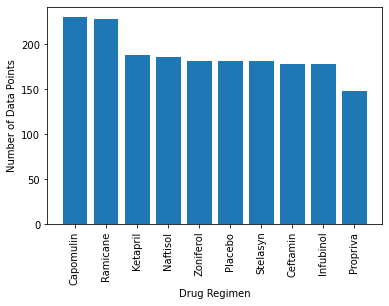

In [68]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(mouse_drug_count.index, mouse_drug_count.values)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

In [62]:
mouse_sex_count = combined_data["Sex"].value_counts()
mouse_sex_count

Male      958
Female    935
Name: Sex, dtype: int64

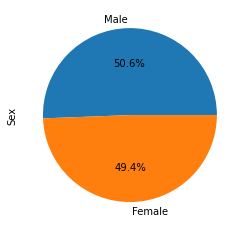

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_count.plot(kind="pie", autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x1ebdbcdb640>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

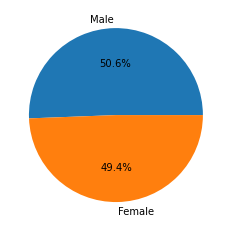

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex_count.values, labels=mouse_sex_count.index, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max = combined_data.groupby('Mouse ID')["Timepoint"].max()
mouse_max
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = combined_data.merge(mouse_max, on=['Mouse ID', 'Timepoint'], how="inner")
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_name in drug_names:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes(filtering)
    # dataframe[dataframe [column]== what I would like to filter[column I only want to see]
    tumor_volume = last_timepoint[last_timepoint['Drug Regimen'] == drug_name]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volumes.append(tumor_volume)
    
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug_name} outliers are: {outliers}")

    

Capomulin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers are: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


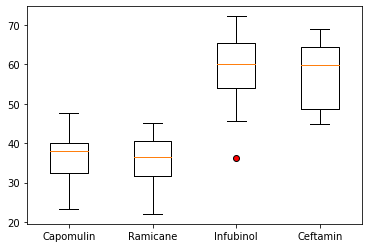

In [92]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volumes, labels=drug_names, flierprops={"markerfacecolor": 'r'})
plt.show()


## Line and Scatter Plots

TypeError: unhashable type: 'numpy.ndarray'

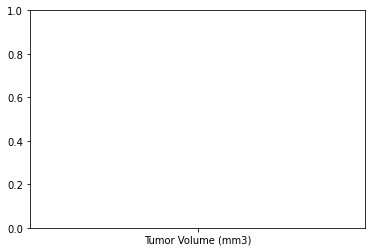

In [98]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x1 = "Tumor Volume (mm3)"
y1 = last_timepoint
plt.plot(x1, y1, label ="line 1")
plt.xlabel('Timepoints(Days)')
plt.ylabel('tumor_volume (mm3)')
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# google - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html